In [26]:
import zipfile
import pandas as pd
from pandas import DataFrame, Series
import seaborn
from io import TextIOWrapper
from zipfile import ZipFile, ZIP_STORED, ZIP_DEFLATED
import csv
import re
import matplotlib 
from matplotlib import pyplot as plt
import datetime
import calendar
import numpy as np

In [27]:
matplotlib.rcParams["font.size"]=18



In [28]:
def read_csv(name):
    with open(name, 'rb') as WI:
        reader = csv.reader(TextIOWrapper(WI))
        for row in reader:
            yield row
            
def make_df(name):
    reader = read_csv(name)
    header = next(reader)
    df = DataFrame(reader)
    df.columns = header
    return df

In [29]:
df = make_df('General_Payment_Data___Detailed_Dataset_2018_Reporting_Year-2.csv')

In [30]:
df['Date_of_Payment']= pd.to_datetime(df['Date_of_Payment'])
df['Total_Amount_of_Payment_USDollars']=df['Total_Amount_of_Payment_USDollars'].str.replace(',',"").astype(float)

# DRUG AND MEDICAL COMPANIES PAY A LOT OF MONEY TO PHYSICIANS AND TEACHING

### 1. How much money in total typically gets paid out on a given day over time in January? 

In [31]:
df_1 = df[df.Date_of_Payment.dt.month == 1]
df_1 = df_1.groupby(['Date_of_Payment']).sum()

Text(0.5, 0, 'Date (January)')

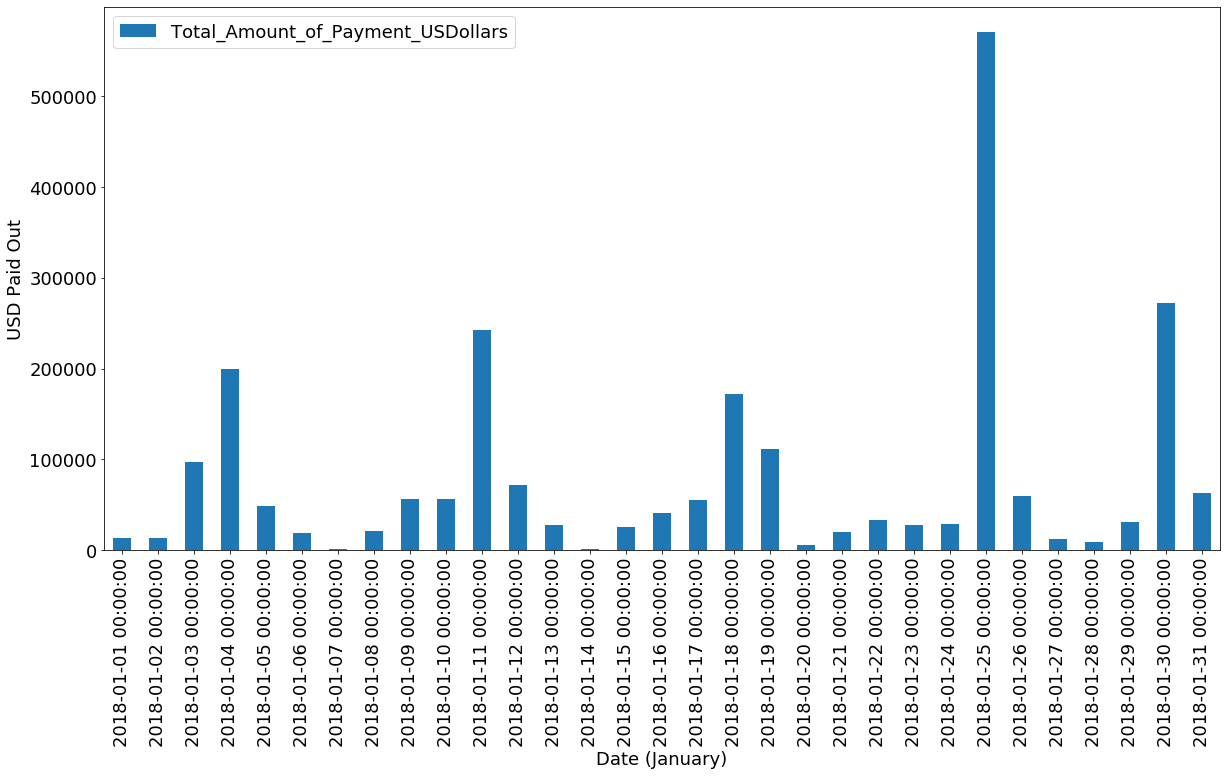

In [32]:
fig, ax = plt.subplots(figsize=(20,10))
# ax.bar(x=df_1['Date_of_Payment'],height=df_1['Total_Amount_of_Payment_USDollars'])
df_1.plot.bar(ax=ax)
ax.set_ylabel('USD Paid Out')
ax.set_xlabel('Date (January)')

# plt.xticks([0.5],['hello'])

## How about March, 2018?

Text(0.5, 0, 'Date (March)')

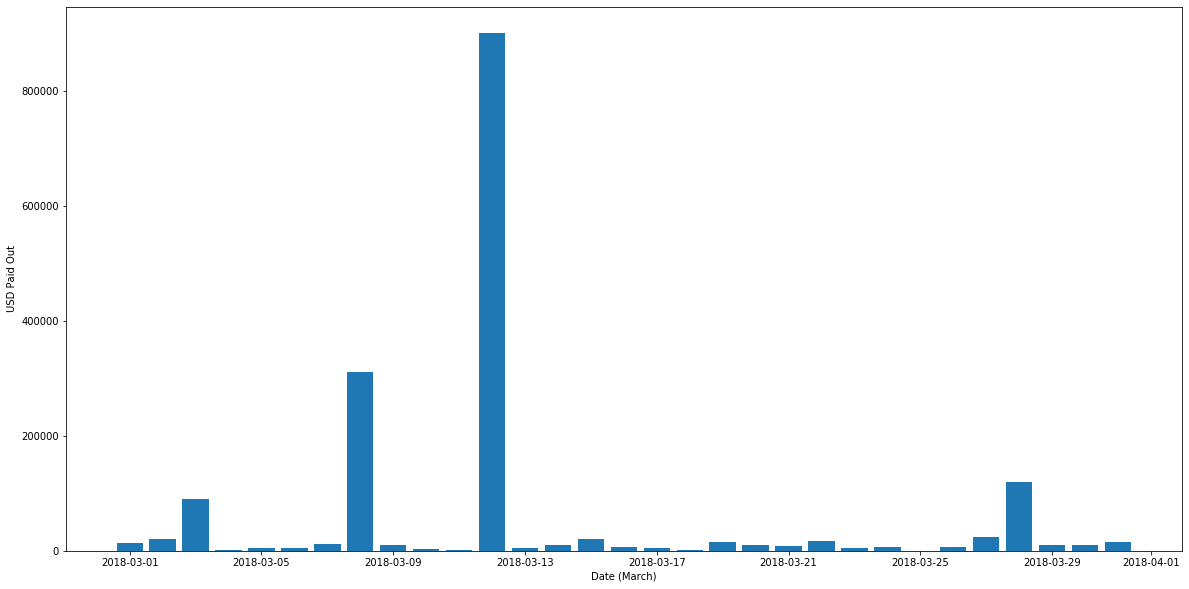

In [16]:
df_2 = df[df.Date_of_Payment.dt.month == 3]
fig, ax = plt.subplots(figsize=(20,10))
ax.bar(x=df_2['Date_of_Payment'],height=df_2['Total_Amount_of_Payment_USDollars'])
ax.set_ylabel('USD Paid Out')
ax.set_xlabel('Date (March)')

## Do other months have outrageous payouts like that?


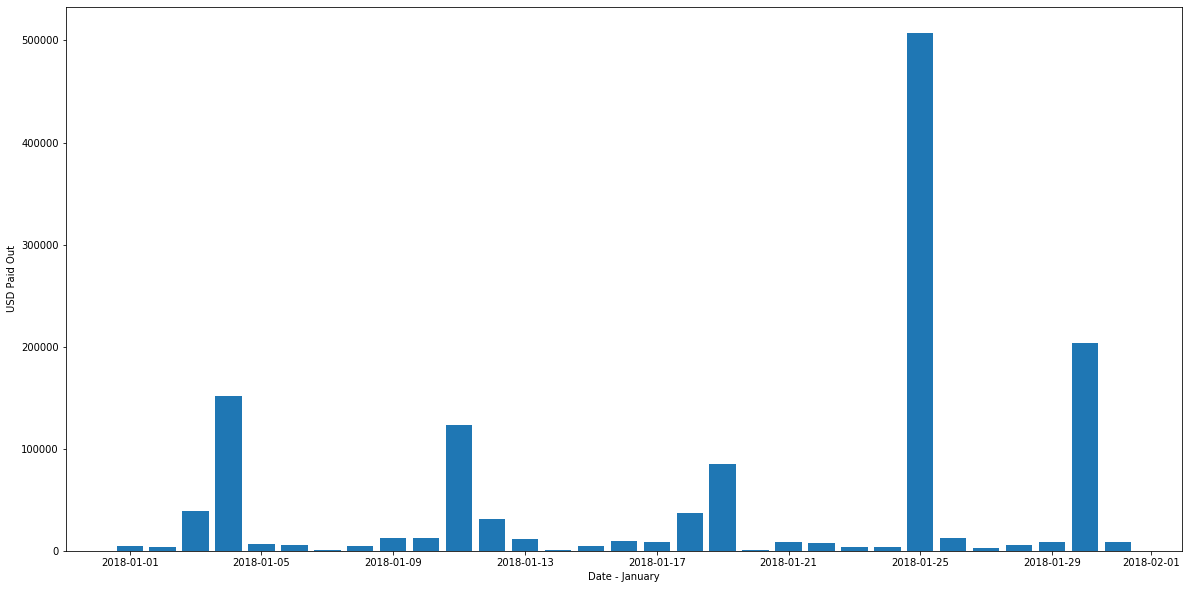

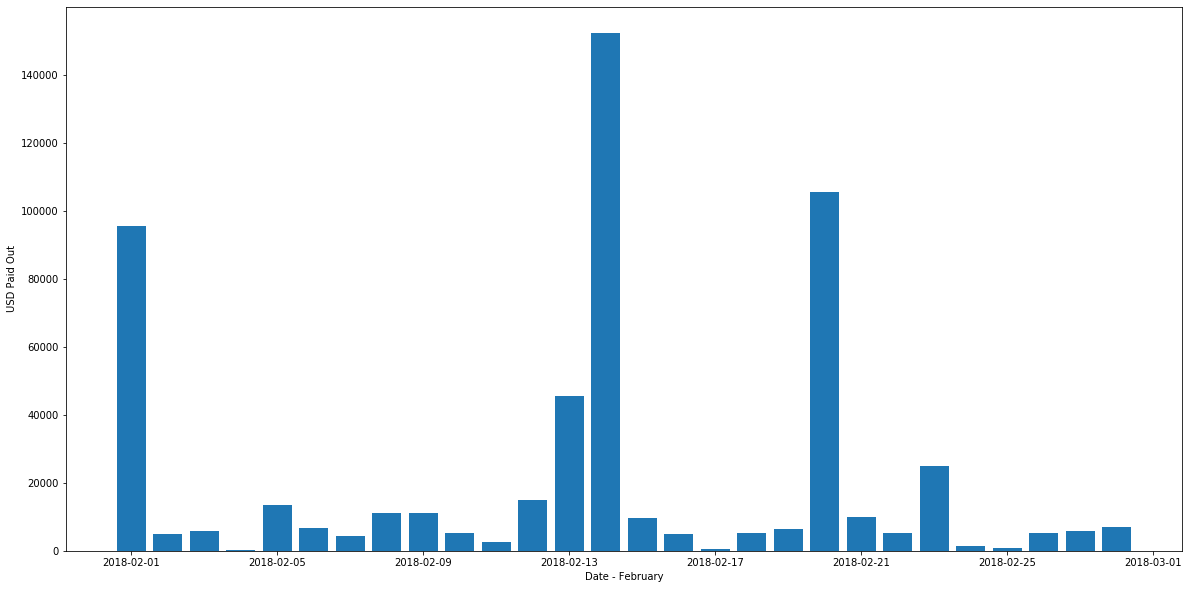

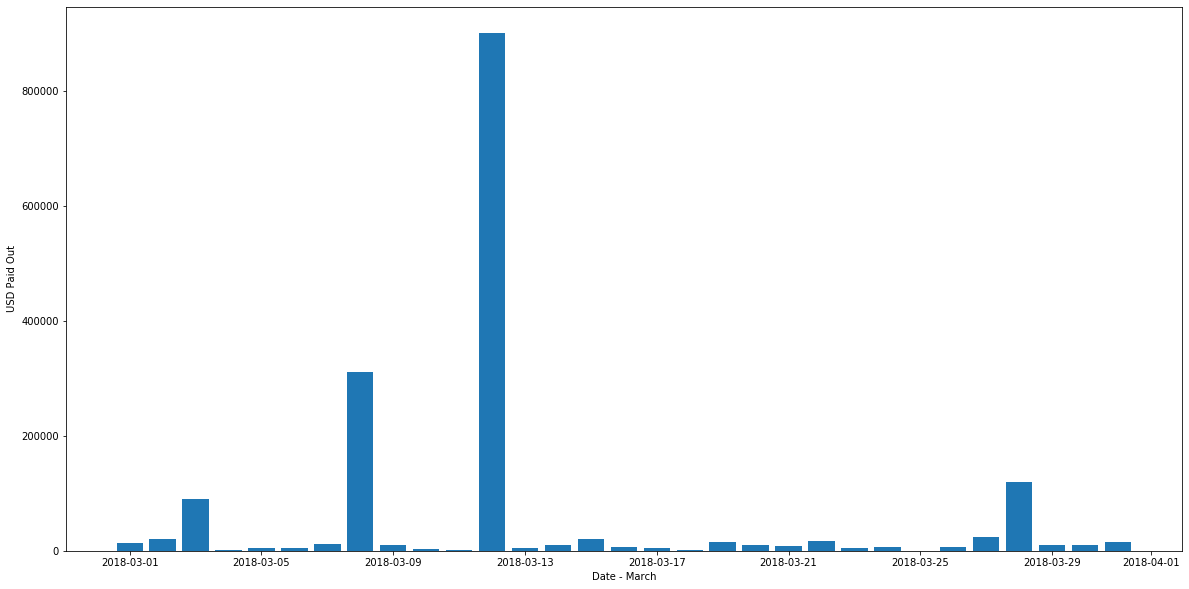

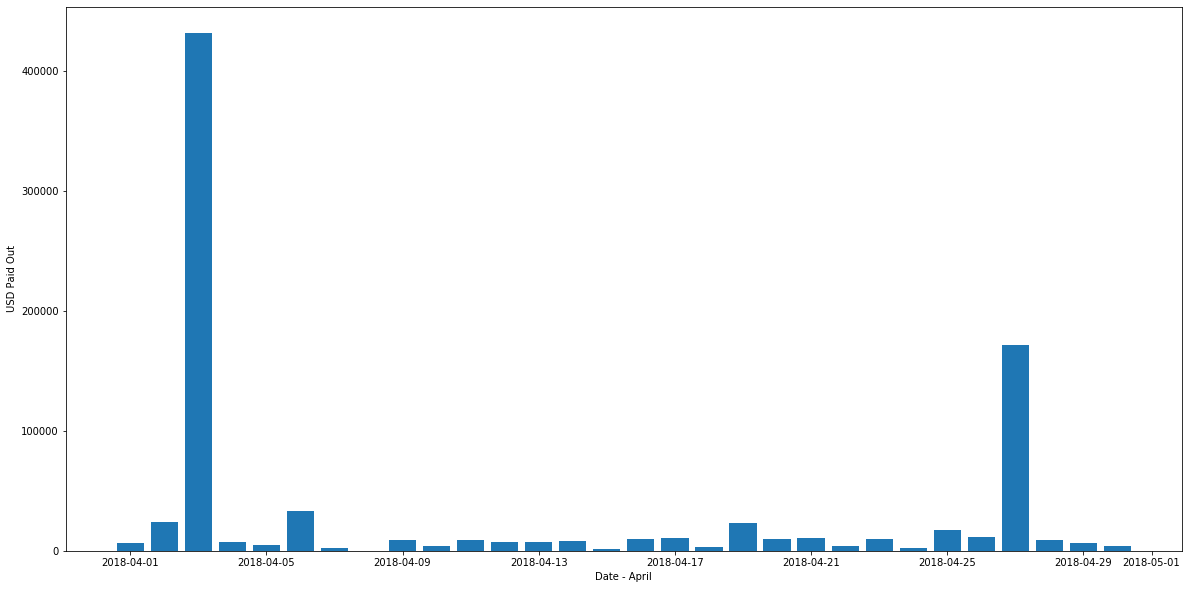

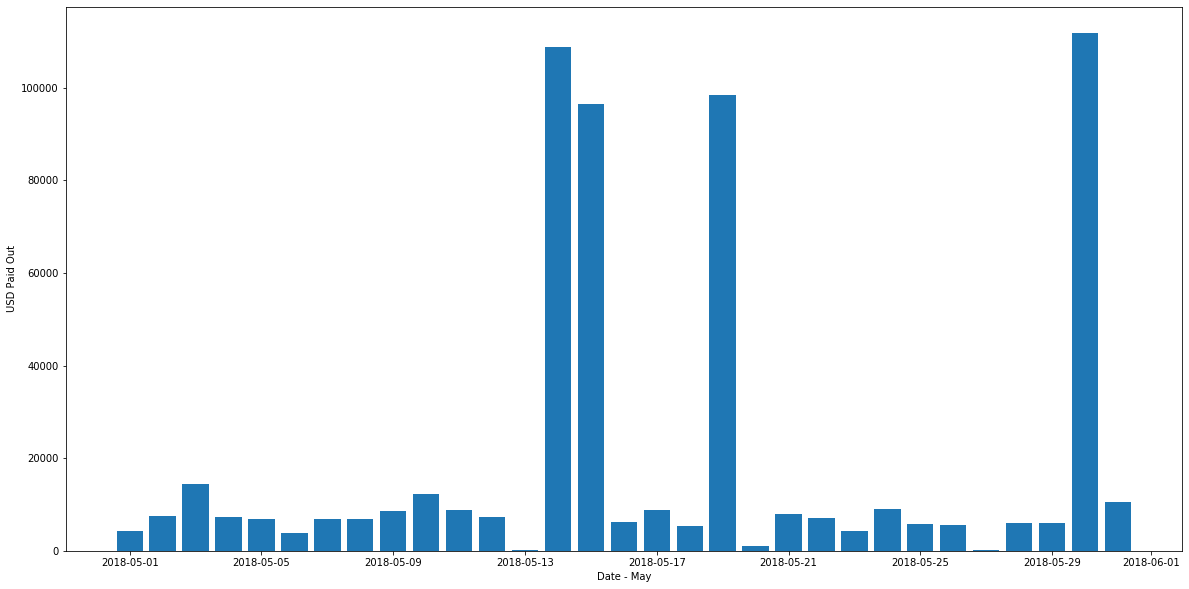

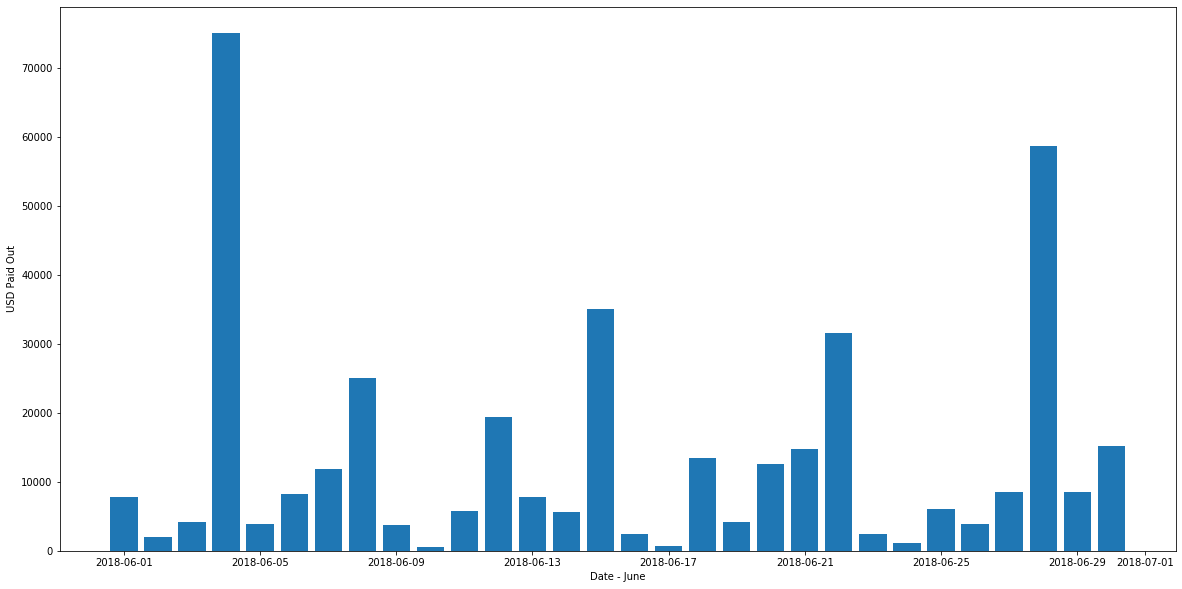

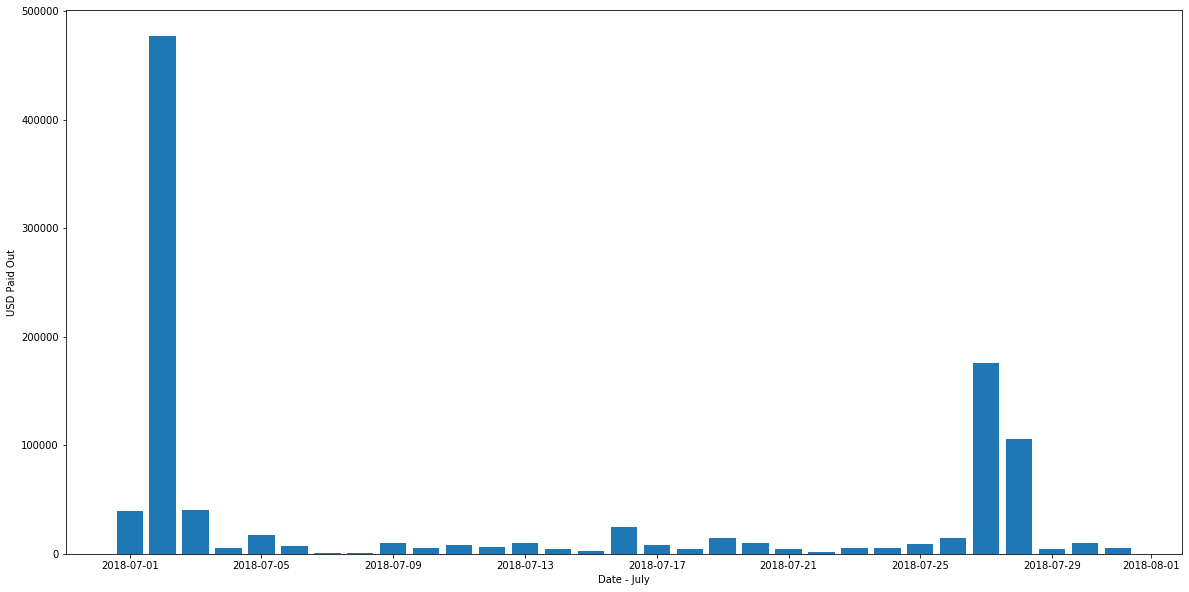

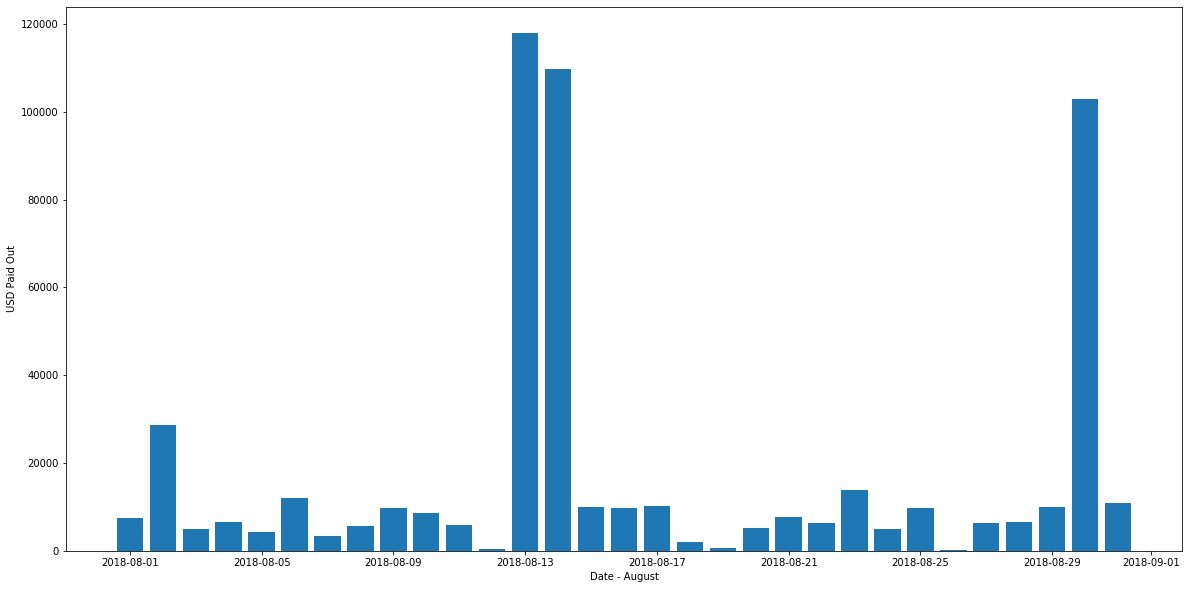

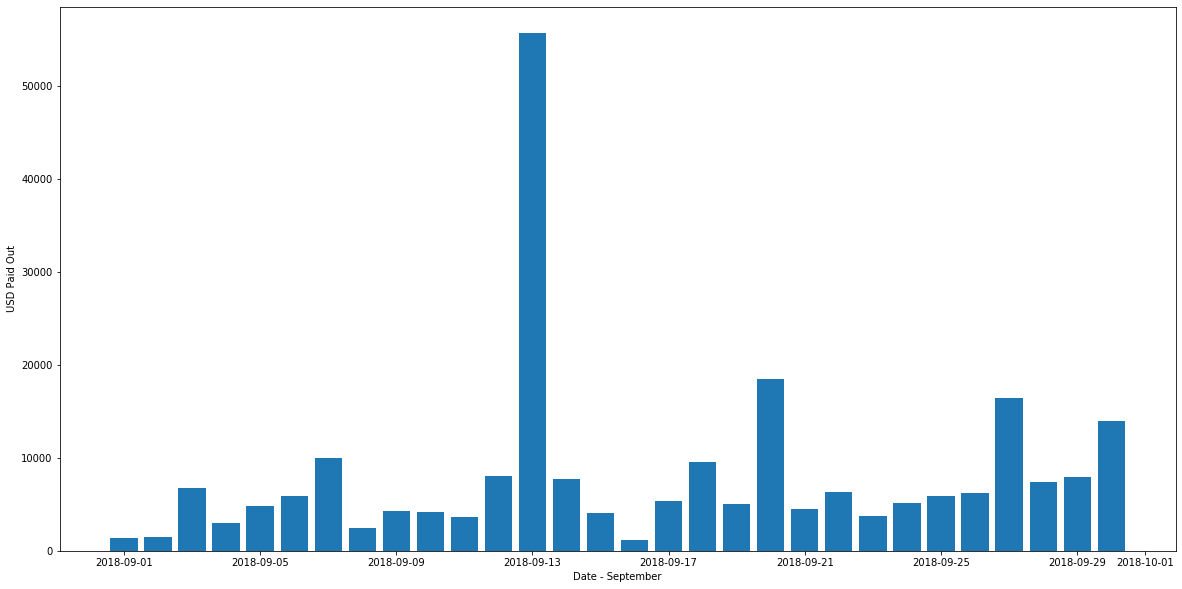

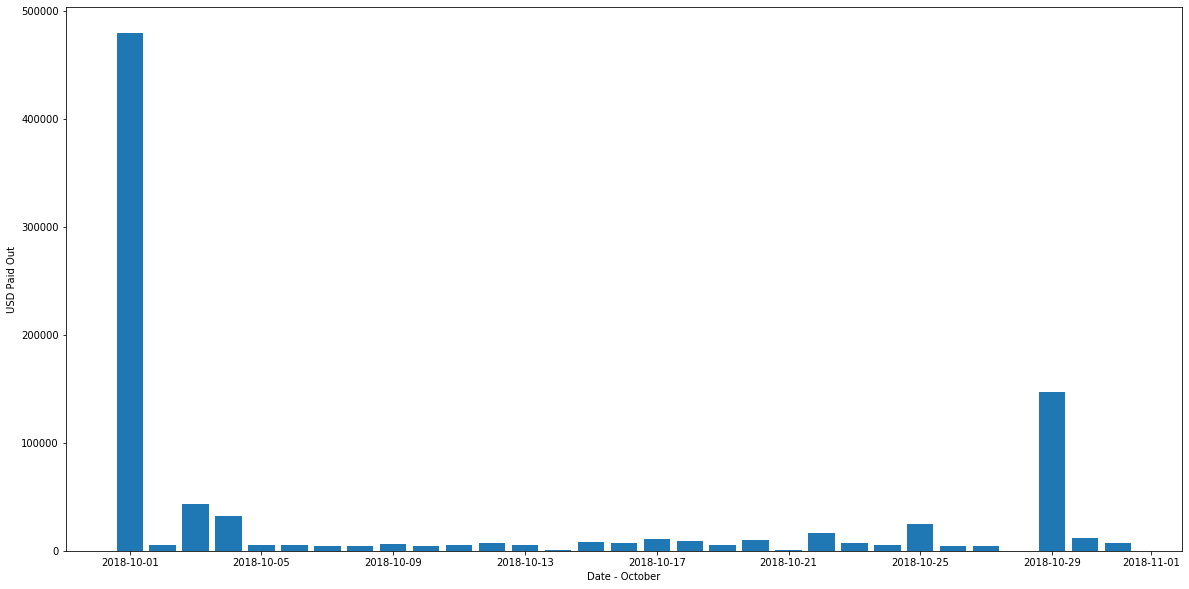

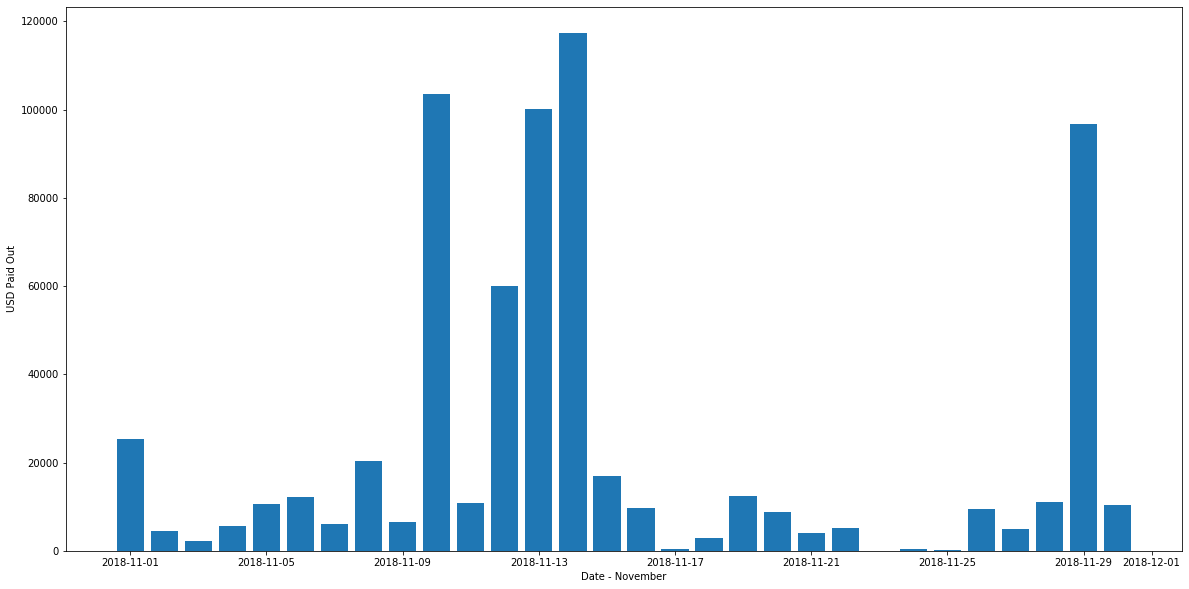

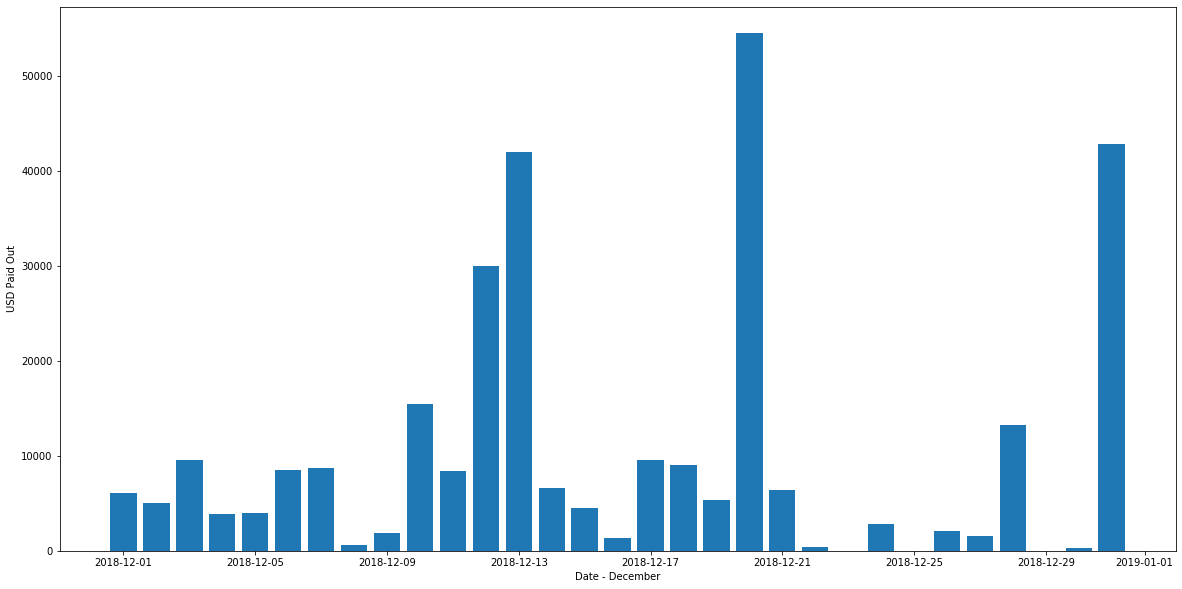

In [18]:
for i in range(1,13):
    df_2 = df[df.Date_of_Payment.dt.month == i]
    fig, ax = plt.subplots(figsize=(20,10))
    ax.bar(x=df_2['Date_of_Payment'],height=df_2['Total_Amount_of_Payment_USDollars'])
    ax.set_ylabel('USD Paid Out')
    ax.set_xlabel('Date - '+calendar.month_name[i])

## 3. What do payments look like throughout the entire year?

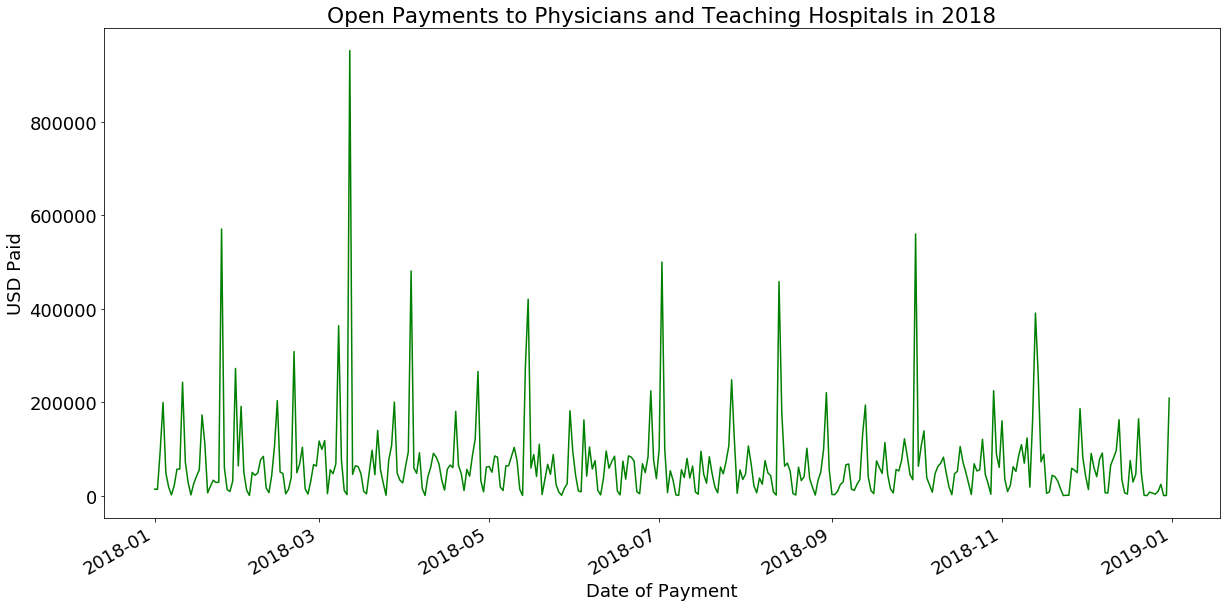

In [33]:
fig,ax = plt.subplots(figsize = (20,10))
df.groupby(['Date_of_Payment']).sum().plot.line(ax=ax,color="green", legend = False)
ax.set_ylabel('USD Paid')
ax.set_xlabel('Date of Payment')
ax.set_title('Open Payments to Physicians and Teaching Hospitals in 2018')
plt.savefig('payments.png')

## Average Payment Per Day

In [8]:
df.groupby(['Date_of_Payment']).sum()['Total_Amount_of_Payment_USDollars'].mean()

70163.8046978022

In [9]:
df.groupby(['Date_of_Payment']).sum()['Total_Amount_of_Payment_USDollars'].median()

49340.505

## Maximum Payments (Payments Aggregated by Day)

In [10]:
df_daily = df.groupby(['Date_of_Payment']).sum()
df_daily[df_daily['Total_Amount_of_Payment_USDollars']==df_daily['Total_Amount_of_Payment_USDollars'].max()]

,Total_Amount_of_Payment_USDollars
Date_of_Payment,
2018-03-12,952173.42


## Minimum Payments (Payments Aggregated by Day)

In [11]:
df_daily[df_daily['Total_Amount_of_Payment_USDollars']==df_daily['Total_Amount_of_Payment_USDollars'].min()]

,Total_Amount_of_Payment_USDollars
Date_of_Payment,
2018-11-23,23.17


Text(0, 0.5, '')

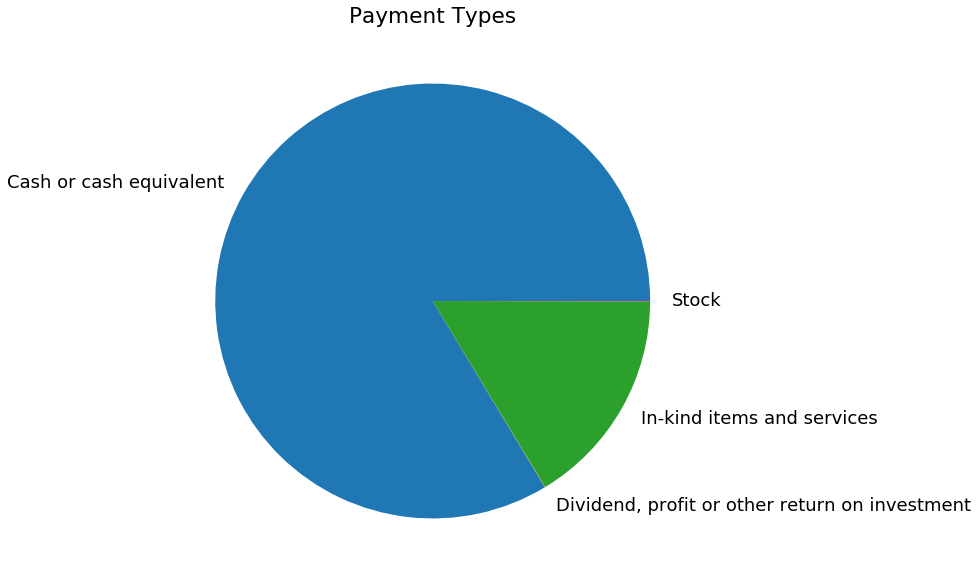

In [29]:
df_pmt = df.groupby('Form_of_Payment_or_Transfer_of_Value').sum()
ax = df_pmt.plot.pie(y='Total_Amount_of_Payment_USDollars', legend=False, figsize=(10,10))
ax.set_title('Payment Types')
ax.set_ylabel("")

## How is the Money being used? - Wat is dis?

Text(0.5, 0, '')

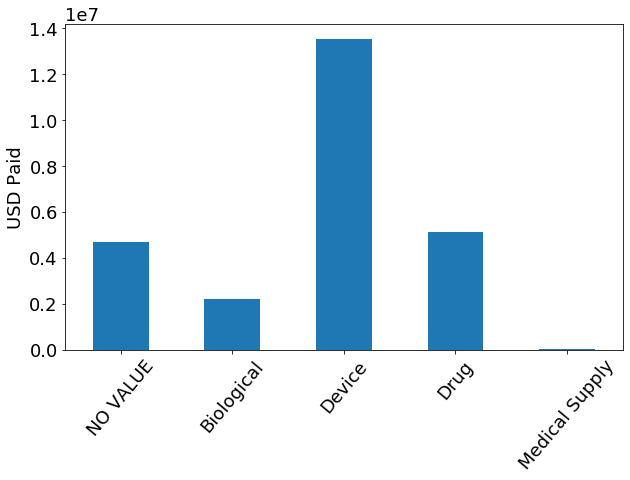

In [37]:
df.columns.str.contains("Drug_or_Biological_or_Device_or_Medical_Supply")
df.filter(regex='Drug_or_Biological', axis=1)

df_spent = df[['Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_1','Name_of_Drug_or_Biological_or_Device_or_Medical_Supply_1',"Total_Amount_of_Payment_USDollars","Nature_of_Payment_or_Transfer_of_Value"]]
ax = df_spent.groupby('Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_1').sum().plot.bar(legend=False, figsize=(10,6))
ax.set_xticklabels(['NO VALUE','Biological','Device','Drug','Medical Supply'],rotation=50)
ax.set_ylabel('USD Paid')
ax.set_xlabel('')

Text(0, 0.5, 'USD Paid')

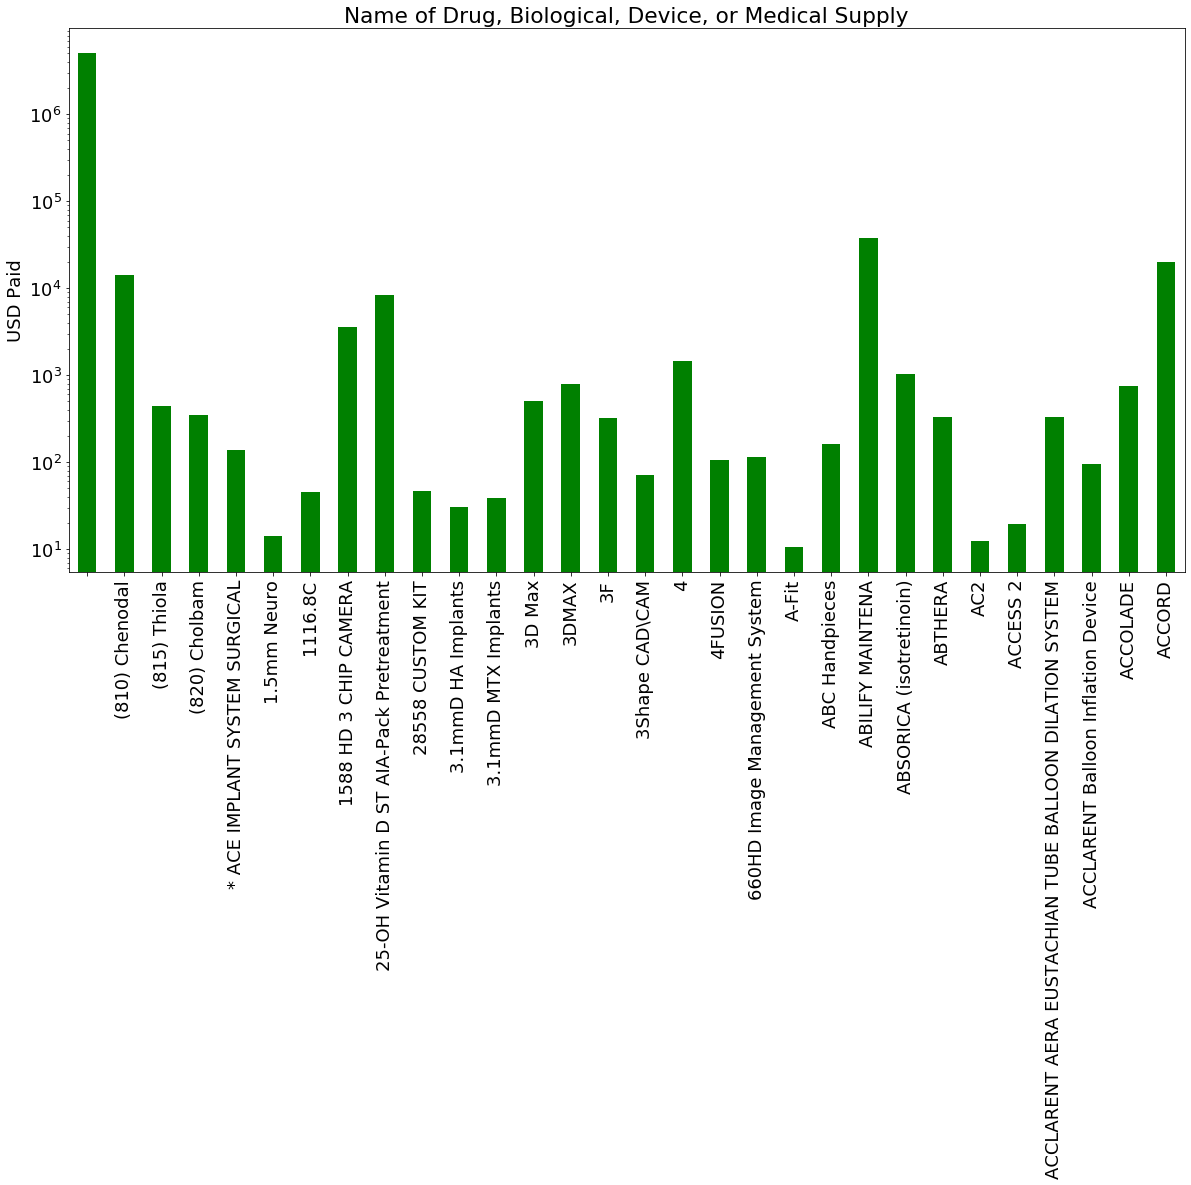

In [49]:
# df_new = df_spent.plot.bar(x='Name_of_Drug_or_Biological_or_Device_or_Medical_Supply_1', y='Total_Amount_of_Payment_USDollars')
# df_new = df_spent.sort_values(by='Total_Amount_of_Payment_USDollars', ascending=False).head(20)
# df_new.groupby('Name_of_Drug_or_Biological_or_Device_or_Medical_Supply_1').sum()
df_new = df_spent.groupby('Name_of_Drug_or_Biological_or_Device_or_Medical_Supply_1').sum().head(30)
ax_1 = df_new.plot.bar(y='Total_Amount_of_Payment_USDollars',figsize=(20,10), legend = False,logy=True, color= 'green')
# plt.xticks(rotation=60)
ax_1.set_xlabel("")
ax_1.set_title("Name of Drug, Biological, Device, or Medical Supply")
ax_1.set_ylabel("USD Paid")
# ax_1.text(0, 1, 'NO VALUE',transform=ax.transAxes)

### So even though in total, devices is the category with highest paid amount. However, when looking at individual payments, "no value" dominates 

Text(0.5, 0, '')

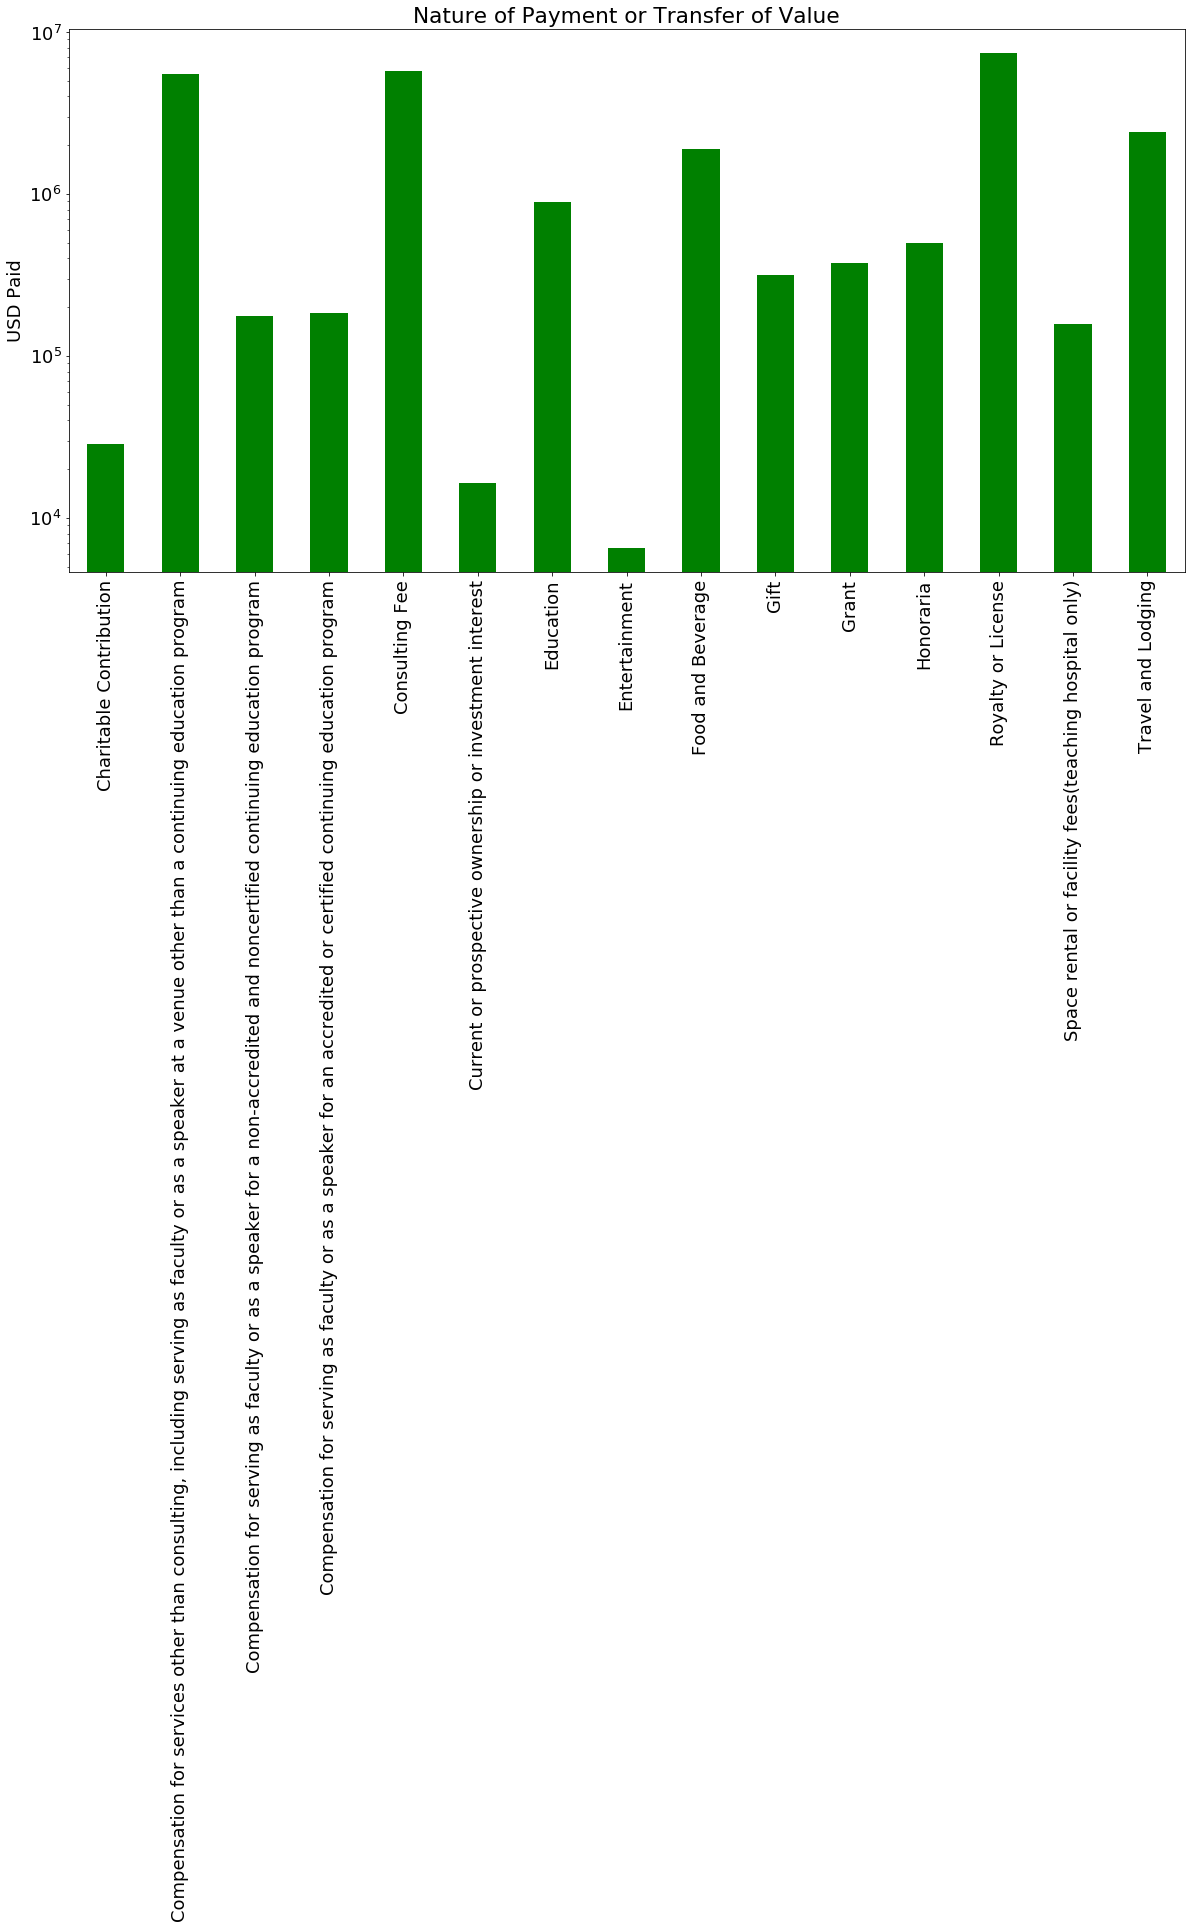

In [48]:
df_nature = df_spent.groupby('Nature_of_Payment_or_Transfer_of_Value').sum()
ax_2 = df_nature.plot.bar(y='Total_Amount_of_Payment_USDollars',figsize=(20,10), legend = False,logy=True, color= 'green')
ax_2.set_title("Nature of Payment or Transfer of Value")
ax_2.set_ylabel("USD Paid")
ax_2.set_xlabel("")

## Number of Payments In Total Amount

Text(0.5, 1.0, 'Frequence of Payments Per Total Amount')

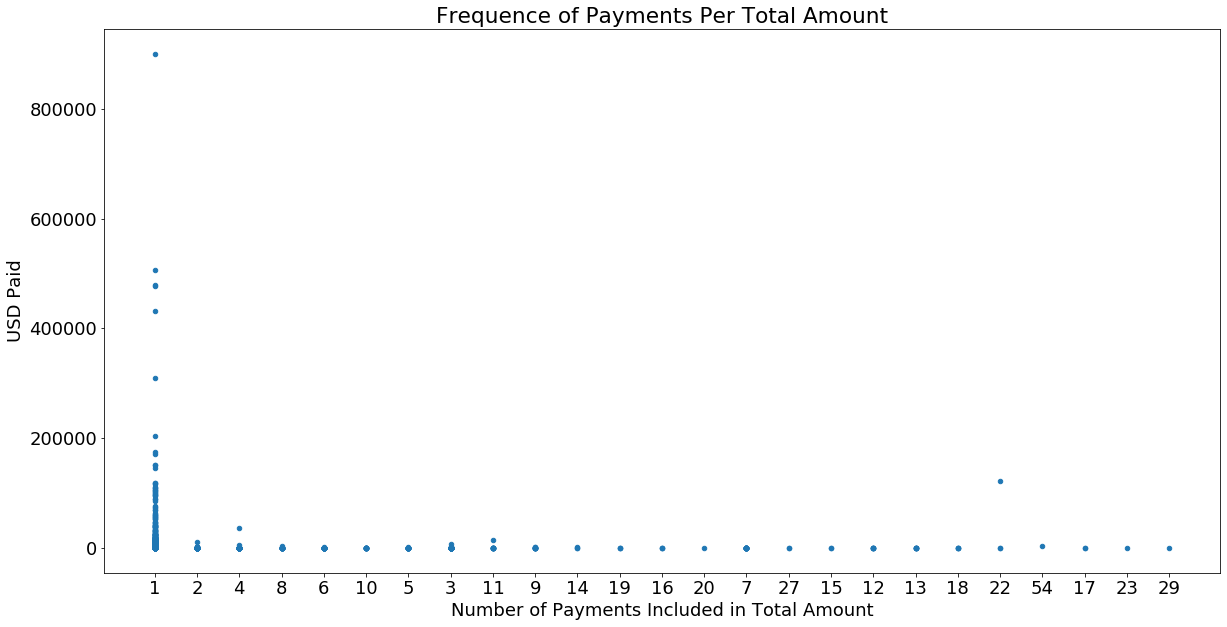

In [7]:
df_num = df.groupby('Number_of_Payments_Included_in_Total_Amount').sum()
ax_3 = df.plot.scatter(x='Number_of_Payments_Included_in_Total_Amount',y='Total_Amount_of_Payment_USDollars', figsize=(20,10))
ax_3.set_xlabel('Number of Payments Included in Total Amount')
ax_3.set_ylabel('USD Paid')
ax_3.set_title('Frequence of Payments Per Total Amount')

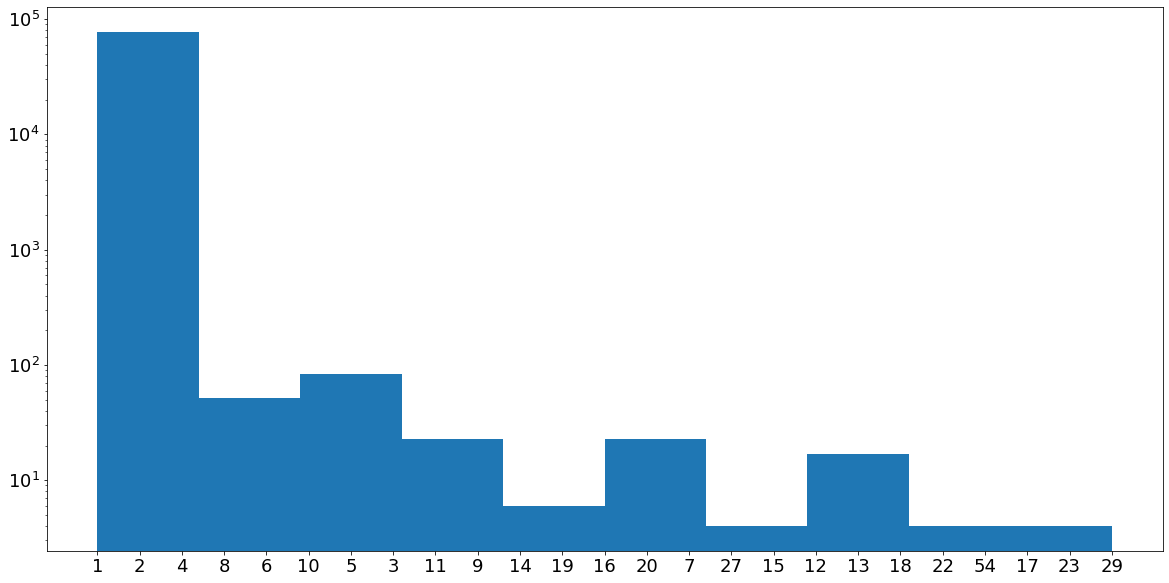

In [35]:
fig, ax = plt.subplots(figsize=(20,10))
plt.hist(df['Number_of_Payments_Included_in_Total_Amount'], bins = 10)
plt.yscale('log')

## Recipients (Is this right?)

In [96]:
# df_rec = df.groupby('Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name').sum()
df_rec = df[['Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name','Total_Amount_of_Payment_USDollars']]
df_rec.sort_values(by='Total_Amount_of_Payment_USDollars', ascending=False)

#the top 5
df2 = df_rec.sort_values(by='Total_Amount_of_Payment_USDollars', ascending=False)[:100].copy()

#others
new_row = pd.DataFrame(data = {
    'Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name' : ['others'],
    'Total_Amount_of_Payment_USDollars' : [df['Total_Amount_of_Payment_USDollars'][100:].sum()]
})

#combining top 5 with others
df2 = pd.concat([df2, new_row])
df2.groupby('Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name').sum().sort_values(by='Total_Amount_of_Payment_USDollars', ascending=False)

,Total_Amount_of_Payment_USDollars
Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name,
others,25526811.26
"CooperSurgical, Inc.",1895237.04
"Zimmer Biomet Holdings, Inc.",1249562.46
Stryker Corporation,1007917.03
"Smith & Nephew, Inc.",900000.00
"Wright Medical Technology, Inc.",697362.38
Merit Medical Systems Inc,397114.05
KARL STORZ Endoscopy-America,335221.92
"Medtronic USA, Inc.",332843.00


Text(0, 0.5, '')

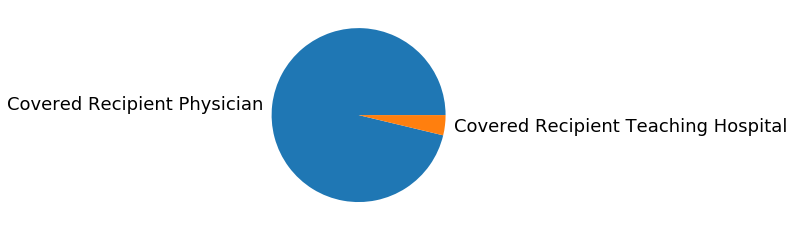

In [49]:
ax = df.groupby('Covered_Recipient_Type').sum().plot.pie(y='Total_Amount_of_Payment_USDollars', legend = False)
ax.set_ylabel("")

In [47]:
df.groupby('Covered_Recipient_Type').sum()

,Total_Amount_of_Payment_USDollars
Covered_Recipient_Type,
Covered Recipient Physician,24584011.13
Covered Recipient Teaching Hospital,955613.78


In [57]:
import requests
import json
url = 'https://openpaymentsdata.cms.gov/resource/xrap-xhey.json'
r = requests.get(url)
DataFrame(json.loads(r.text))

,change_type,covered_recipient_type,physician_profile_id,physician_first_name,physician_middle_name,physician_last_name,recipient_primary_business_street_address_line1,recipient_primary_business_street_address_line2,recipient_city,recipient_state,...,name_of_drug_or_biological_or_device_or_medical_supply_4,associated_drug_or_biological_ndc_4,physician_license_state_code3,covered_or_noncovered_indicator_5,indicate_drug_or_biological_or_device_or_medical_supply_5,product_category_or_therapeutic_area_5,name_of_drug_or_biological_or_device_or_medical_supply_5,associated_drug_or_biological_ndc_5,physician_license_state_code4,physician_license_state_code5
0,UNCHANGED,Covered Recipient Physician,223559,DAVID,BROOKS,WILSON,1325 PENNSYLVANIA AVE,SUITE 560,FORT WORTH,TX,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,UNCHANGED,Covered Recipient Teaching Hospital,NaN,NaN,NaN,NaN,601 Childrens Ln,NaN,Norfolk,VA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,UNCHANGED,Covered Recipient Physician,1370709,SARIN,NaN,PRAKOBWANAKIT,520 SUPERIOR AVE STE 360,NaN,NEWPORT BEACH,CA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,UNCHANGED,Covered Recipient Physician,578674,Carmen,L,Berrios,55 Calle Meditacion,Ste 9a,Mayaguez,PR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,UNCHANGED,Covered Recipient Physician,182836,Amy,K,Sadler,1270 E State Road 205,Ste 240,Columbia City,IN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,UNCHANGED,Covered Recipient Physician,37428,RANDHIR,FRANCIS,MASCARENHAS,1611 W HARRISON ST STE 400,NaN,CHICAGO,IL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,UNCHANGED,Covered Recipient Physician,61875,SHIVANI,NaN,SOOD,79 WAWECUS ST,NaN,NORWICH,CT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
997,UNCHANGED,Covered Recipient Physician,96139,MICHAEL,A,ESLAVA,1711 N. MCKENZIE STREET,NaN,FOLEY,AL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
998,UNCHANGED,Covered Recipient Physician,331243,EVELYN,R,RUNER,333 N. OXFORD VALLEY RD.,SUITE 404,FAIRLESS HILLS,PA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
